In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from os import listdir
from os.path import isfile, isdir, join
from shutil import move

mypath = '../CASIA-WebFace-aligned-cropped'
dirs = [d for d in listdir(mypath) if isdir(join(mypath, d))]

In [3]:
data = []

In [4]:
for d in dirs:
    files = [f for f in listdir(join(mypath, d)) if isfile(join(mypath, d, f))]
    length = len(files)
    for f in files:
        data.append((d, length, join(d, f)))

In [5]:
df = pd.DataFrame(data, columns=['person', 'count', 'path'])

In [6]:
df.shape

(65331, 3)

In [7]:
df['person'].unique().shape

(2081,)

In [10]:
import numpy as np
np.min(df.groupby(['person']).count().reset_index()['count'])

1

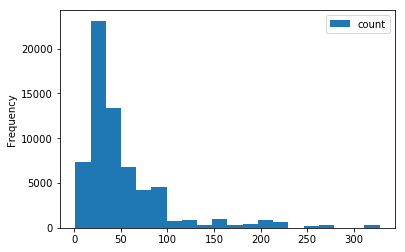

In [7]:
df[['count']].plot.hist(stacked=True, bins=20)

In [8]:
df.head()

,person,count,path
0,3331486,13,3331486/007.png
1,3331486,13,3331486/002.png
2,3331486,13,3331486/008.png
3,3331486,13,3331486/006.png
4,3331486,13,3331486/012.png


In [9]:
df.shape

(65331, 3)

In [10]:
# Drop person whose pic count is less than 10

In [11]:
train = df

In [12]:
train.shape

(65331, 3)

In [13]:
train.to_csv('webface.aligned.train.csv', index=False)

In [14]:
train.shape

(65331, 3)

In [15]:
# i=0
# for f in listdir('../Facescrub-Faceonly/Alexander Skarsgrd'):
#     move(join('../Facescrub-Faceonly/Alexander Skarsgrd', f), join('../Facescrub-Faceonly/Alexander Skarsgrd', 'Alexander Skarsgrd_face_'+str(i)+'.jpg'))
#     i = i+ 1